In [1]:
import os
os.chdir('../')

In [2]:
import json
import seml
import pandas as pd
import numpy as np
#from run_seml import run
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from notebooks import mpl_latex
matplotlib.rcParams['axes.unicode_minus'] = False

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [4]:
#mpl_latex.enable_production_mode()

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [138]:
df_experiments = seml.get_results('neurips21_local_attack',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])

df_csv = pd.read_csv('cache/neurips_local_attacks.csv', index_col=0)
df_csv['result.results'] = df_csv['result.results'].apply(lambda string: string.replace("'", '"')).apply(json.loads)

df_experiments = pd.concat([df_experiments, df_csv], ignore_index=True)
df_experiments.head()

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


,_id,batch_id,slurm.experiments_per_job,slurm.sbatch_options.time,slurm.sbatch_options.nodes,slurm.sbatch_options.cpus-per-task,slurm.sbatch_options.mem,slurm.sbatch_options.gres,slurm.sbatch_options.qos,config.overwrite,config.db_collection,config.dataset,config.attack,config.attack_params.ppr_cache_params.data_artifact_dir,config.attack_params.ppr_cache_params.data_storage_type,config.attack_params.display_step,config.attack_params.do_synchronize,config.attack_params.epochs,config.attack_params.fine_tune_epochs,config.attack_params.loss_type,config.attack_params.lr_factor,config.attack_params.ppr_recalc_at_end,config.attack_params.search_space_size,config.nodes,config.nodes_topk,config.epsilons,config.seed,config.artifact_dir,config.model_storage_type,config.model_label,config.data_dir,config.binary_attr,config.make_undirected,config.data_device,config.device,config.debug_level,result.results,slurm.sbatch_options.partition,slurm.sbatch_options.job-name,slurm.sbatch_options.array,slurm.sbatch_options.output,slurm.array_id,slurm.task_id,config.config_hash,config.surrogate_model_storage_type,config.surrogate_model_label
0,1,1,1.0,2-00:00,1.0,4.0,24G,gpu:1,interactive,1,neurips21_local_attack,ogbn-products,LocalBatchedPRBCD,cache,ppr,5.0,True,150.0,50.0,Margin,0.001,True,20000.0,None,40,"[0.5, 0.75, 1.0]",0,cache,victim_products,Vanilla PPRGo,datasets,False,False,cpu,0,info,"[{'label': 'Vanilla PPRGo', 'epsilon': 0.5, 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,3,1.0,1-00:00,1.0,4.0,24G,gpu:1,NaN,5,neurips21_local_attack,ogbn-products,LocalPRBCD,cache,ppr,2.0,True,30.0,5.0,Margin,0.050,NaN,20000.0,None,40,"[0.5, 1.0]",0,cache,pretrained,Vanilla GCN (surrogate),datasets,False,False,cpu,0,info,"[{'label': 'Vanilla GCN (surrogate)', 'epsilon...",gpu_large,products_localprbcd_3,0-2,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6420275.0,0.0,NaN,NaN,NaN
2,6,3,1.0,1-00:00,1.0,4.0,24G,gpu:1,NaN,6,neurips21_local_attack,ogbn-products,LocalPRBCD,cache,ppr,2.0,True,30.0,5.0,Margin,0.050,NaN,20000.0,None,40,"[0.5, 1.0]",1,cache,pretrained,Vanilla GCN (surrogate),datasets,False,False,cpu,0,info,"[{'label': 'Vanilla GCN (surrogate)', 'epsilon...",gpu_large,products_localprbcd_3,0-2,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6420275.0,1.0,NaN,NaN,NaN
3,7,3,1.0,1-00:00,1.0,4.0,24G,gpu:1,NaN,7,neurips21_local_attack,ogbn-products,LocalPRBCD,cache,ppr,2.0,True,30.0,5.0,Margin,0.050,NaN,20000.0,None,40,"[0.5, 1.0]",5,cache,pretrained,Vanilla GCN (surrogate),datasets,False,False,cpu,0,info,"[{'label': 'Vanilla GCN (surrogate)', 'epsilon...",gpu_large,products_localprbcd_3,0-2,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6420275.0,2.0,NaN,NaN,NaN
4,8,4,1.0,1-00:00,1.0,4.0,24G,gpu:1,NaN,8,neurips21_local_attack,ogbn-products,LocalPRBCD,cache,ppr,2.0,True,30.0,5.0,Margin,0.050,NaN,20000.0,None,40,"[0.5, 1.0]",0,cache,pretrained,Vanilla GCN (surrogate),datasets,False,False,cpu,0,info,"[{'label': 'Vanilla GCN (surrogate)', 'epsilon...",gpu_large,products_localprbcd_4,0-5,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6420339.0,0.0,6b7b8fc84dab5b2010269b8298109c5d,NaN,NaN


In [139]:
df_experiments.columns

Index(['_id', 'batch_id', 'slurm.experiments_per_job',
       'slurm.sbatch_options.time', 'slurm.sbatch_options.nodes',
       'slurm.sbatch_options.cpus-per-task', 'slurm.sbatch_options.mem',
       'slurm.sbatch_options.gres', 'slurm.sbatch_options.qos',
       'config.overwrite', 'config.db_collection', 'config.dataset',
       'config.attack',
       'config.attack_params.ppr_cache_params.data_artifact_dir',
       'config.attack_params.ppr_cache_params.data_storage_type',
       'config.attack_params.display_step',
       'config.attack_params.do_synchronize', 'config.attack_params.epochs',
       'config.attack_params.fine_tune_epochs',
       'config.attack_params.loss_type', 'config.attack_params.lr_factor',
       'config.attack_params.ppr_recalc_at_end',
       'config.attack_params.search_space_size', 'config.nodes',
       'config.nodes_topk', 'config.epsilons', 'config.seed',
       'config.artifact_dir', 'config.model_storage_type',
       'config.model_label', 'config.d

latest_filter_columns = ['config.dataset', 'config.attack', 'config.model_label']

batch_ids = df_experiments.groupby(latest_filter_columns).batch_id.max().unique()

batch_ids

df_experiments = df_experiments[df_experiments.batch_id.isin(batch_ids)].copy()

df_experiments

df_evaluate = seml.get_results('kdd21_rgnn_at_scale_local_attack_evaluate',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])

In [140]:
df_results = [
    pd.DataFrame(r) 
    for r in df_experiments['result.results']
]

In [141]:
len(df_results)

114

In [142]:
for df_result, (_, df_experiment) in zip(df_results, df_experiments.iterrows()):
    df_result['dataset'] = df_experiment['config.dataset']
    df_result['attack'] = df_experiment['config.attack']
    df_result['seed'] = df_experiment['config.seed']
    df_result['batch_id'] = df_experiment['batch_id']
    df_result['original_id'] = df_experiment['_id']
    df_result['make_undirected'] = df_experiment['config.make_undirected']

df_results = pd.concat(df_results, ignore_index=True)
df_results = df_results.sort_values('batch_id')
# df_results = df_results.drop_duplicates([
#     c for c in df_results.columns if c != 'batch_id' and c != 'accuracy'
# ], keep='last')

df_results

,label,epsilon,n_perturbations,degree,logits,initial_logits,larget,node_id,perturbed_edges,logit_target,logit_best_non_target,confidence_target,confidence_non_target,margin,initial_logit_target,initial_logit_best_non_target,initial_confidence_target,initial_confidence_non_target,initial_margin,dataset,attack,seed,batch_id,original_id,make_undirected,target
0,Vanilla PPRGo,0.50,1,2,"[[-177.48780822753906, -381.1254577636719, -33...","[[-278.9022521972656, -636.6356201171875, -563...",4.0,1011730,"[[1011730], [684627]]",0.000000,-1.765313e+02,1.000000e+00,2.154827e-77,1.000000,0.000000,-341.265686,1.000000,6.168729e-149,1.000000,ogbn-products,LocalBatchedPRBCD,0,1,1,False,NaN
2689,Vanilla PPRGo,1.00,4,4,"[[1.706148386001587, -0.5395097136497498, -1.1...","[[0.2044059783220291, -0.7246189713478088, -1....",3.0,1084,"[[1084, 1084, 1084, 1084], [273, 485, 1031, 14...",-1.091133,-7.318423e-01,3.358357e-01,4.810220e-01,-0.145186,-0.198064,-2.716592,0.820317,6.609965e-02,0.754217,citeseer,LocalBatchedPRBCD,0,1,15,True,NaN
2690,Vanilla PPRGo,2.00,8,4,"[[2.0033767223358154, -0.5838426947593689, -1....","[[0.2044059783220291, -0.7246189713478088, -1....",3.0,1084,"[[1084, 1084, 1084, 1084, 1084, 1084, 1084, 10...",-1.440520,-5.230792e-01,2.368045e-01,5.926927e-01,-0.355888,-0.198064,-2.716592,0.820317,6.609965e-02,0.754217,citeseer,LocalBatchedPRBCD,0,1,15,True,NaN
2691,Vanilla PPRGo,0.50,1,2,"[[-0.30502963066101074, -0.967430591583252, -0...","[[-0.089509516954422, -0.49450501799583435, -0...",3.0,1472,"[[1472], [2]]",-1.522221,-7.936836e-01,2.182266e-01,4.521761e-01,-0.233949,-0.598073,-2.202586,0.549870,1.105170e-01,0.439353,citeseer,LocalBatchedPRBCD,0,1,15,True,NaN
2692,Vanilla PPRGo,0.75,2,2,"[[-0.3196077346801758, -1.1898571252822876, -0...","[[-0.089509516954422, -0.49450501799583435, -0...",3.0,1472,"[[1472, 1472], [2, 1357]]",-2.036487,-5.360696e-01,1.304863e-01,5.850432e-01,-0.454557,-0.598073,-2.202586,0.549870,1.105170e-01,0.439353,citeseer,LocalBatchedPRBCD,0,1,15,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15935,Vanilla PPRGo Diffusion Embedding,0.10,3,26,"[[-59.27031326293945, -33.28068161010742, -24....","[[-11.297399520874023, -7.726149082183838, -12...",48.0,105374352,"[[105374352, 105374352, 105374352], [56264305,...",-54.928368,0.000000e+00,1.396089e-24,1.000000e+00,-1.000000,-1.393829,-1.760462,0.248124,1.719653e-01,0.076158,ogbn-papers100M,LocalBatchedPRBCD,0,21,177,False,NaN
15934,Vanilla PPRGo Diffusion Embedding,0.25,6,25,"[[-75.29961395263672, -55.2889289855957, -9.38...","[[-25.151552200317383, -12.10372257232666, -9....",49.0,103384973,"[[103384973], [10811829]]",-74.780571,-8.344647e-07,3.335882e-33,9.999992e-01,-0.999999,-1.245927,-2.231428,0.287674,1.073749e-01,0.180299,ogbn-papers100M,LocalBatchedPRBCD,0,21,177,False,NaN
15933,Vanilla PPRGo Diffusion Embedding,0.10,2,25,"[[-87.48504638671875, -72.56523895263672, -49....","[[-25.15155029296875, -12.10372257232666, -9.1...",49.0,103384973,"[[103384973, 103384973], [16565234, 56363590]]",-98.023636,-2.224009e-01,2.684577e-43,8.005943e-01,-0.800594,-1.245927,-2.231428,0.287674,1.073750e-01,0.180299,ogbn-papers100M,LocalBatchedPRBCD,0,21,177,False,NaN
15951,Vanilla PPRGo Diffusion Embedding,0.10,4,39,"[[-106.86676025390625, -17.091501235961914, -5...","[[-14.60943603515625, -5.093795299530029, -20....",129.0,110041562,"[[110041562], [59786401]]",-36.691570,-2.145202e-01,1.161592e-16,8.069285e-01,-0.806929,-1.791786,-1.872933,0.166662,1.536723e-01,0.012990,ogbn-papers100M,LocalBatchedPRBCD,0,21,177,False,NaN


In [155]:
labels_to_plot = [
    'Soft Median RPPRGo (T=5.0)',
    'Soft Median RPPRGo (T=0.5)',
    'Vanilla PPRGo',
    'Vanilla GCN',
    'Vanilla GCN (surrogate)',
    'Vanilla PPRGo Diffusion Embedding',
    'Soft Median PPRGo Diffusion (T=0.5)'
]

In [156]:
df_results.label.unique()

array(['Vanilla PPRGo', 'Vanilla GCN', 'Vanilla GCN (surrogate)',
       'Soft Median RPPRGo (T=0.5)', 'Soft Median RPPRGo (T=0.2)',
       'Soft Median RPPRGo (T=1.0)', 'Vanilla PPRGo Diffusion Embedding',
       'Soft Median PPRGo Diffusion (T=0.5)'], dtype=object)

In [157]:
dataset_map = {
    'cora_ml': r'\textbf{Cora ML}',#'~\citep{Bojchevski2018}}', # '\rotatebox{90}{Cora ML~\citep{Bojchevski2018}}',
    'citeseer': r'\textbf{Citeseer}',#~\citep{McCallum2000}}',
    'pubmed': r'\textbf{PubMed}',#~\citep{Sen2008}}',
    'ogbn-arxiv': r'\textbf{arXiv}',#~\citep{Hu2020}}',
    'ogbn-products': r'\textbf{Products}',#~\citep{Hu2020}}',
    'ogbn-papers100M': r'\textbf{Papers 100M}',#~\citep{Hu2020}}'
}
dataset_order = [dataset_map[k] for k in dataset_map.keys()]

In [158]:
attack_map = {
    'LocalPRBCD': r'Local PRBCD',
    'LocalBatchedPRBCD': r'Local PRBCD',
    'Nettack': r'Nettack'
}
attack_order = [attack_map[k] for k in attack_map.keys()]

In [159]:
def transform_label(label: str):
    return label.replace('RPPRGo (T=5.0)', 'PPRGo')\
        .replace('RPPRGo (T=0.5)', 'PPRGo')\
        .replace(' (surrogate)', '')

In [160]:
def calc_mean_and_error(values: pd.Series, seeds: pd.Series = None, with_error=True, decimal_places: int = 3): 
    if seeds is not None:
        values, seeds = values.values, seeds.values
        seeds = seeds[~np.isnan(values)]
        values = values[~np.isnan(values)]

        idx = np.unique(seeds, return_index=True)[1]
        values = values[idx]
    
    if with_error:
        return rf'{np.mean(values):.{decimal_places}f} $\pm$ {np.std(values)/len(values):.{decimal_places}f}'
    else:
        return rf'{np.mean(values):.{decimal_places}f}'

In [161]:
architecture_c = r'Architecture'
dataset_c = r'   '
attack_c = r'Attack'
epsilons_c = r'Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$'
margin_c = r'Margin $\psi$'
make_undirected_c = 'Undirected'

In [162]:
nodes_for_each_budget = df_results[df_results.epsilon == 0.5].node_id.unique()

results = []

for (dataset, attack, label, epsilon, make_undirected), df_group in (
    df_results
        [df_results.label.isin(labels_to_plot)]
        .groupby(['dataset', 'attack', 'label', 'epsilon', 'make_undirected'])
):
    before_correct_rate = (df_group.initial_margin >= 0).mean()
    initial_margin = calc_mean_and_error(df_group.initial_margin, with_error=True)
    margin = calc_mean_and_error(df_group.margin, with_error=True)
    flip_rate = (
        df_group[(df_group.margin < 0) & (df_group.initial_margin > 0)].initial_margin.count()
        / df_group[df_group.initial_margin > 0].initial_margin.count()
    )

    confidence_target = calc_mean_and_error(df_group.confidence_target, with_error=False)
    confidence_non_target = calc_mean_and_error(df_group.confidence_non_target, with_error=False)
    initial_confidence_target = calc_mean_and_error(df_group.initial_confidence_target, with_error=False)
    initial_confidence_non_target = calc_mean_and_error(df_group.initial_confidence_non_target, with_error=False)

    results.append({
         dataset_c: dataset_map[dataset],
         architecture_c: transform_label(label),
         attack_c: attack_map[attack],
         epsilons_c: epsilon,
         make_undirected_c: make_undirected,
         'before_correct_rate': before_correct_rate,
         'initial_margin': initial_margin,
         'margin': margin,
         'flip_rate': flip_rate,
         'confidence_target': confidence_target,
         'confidence_non_target': confidence_non_target,
         'initial_confidence_target': initial_confidence_target,
         'initial_confidence_non_target': initial_confidence_non_target,
    })
    
df = pd.DataFrame(results)

df

,,Architecture,Attack,"Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$",Undirected,before_correct_rate,initial_margin,margin,flip_rate,confidence_target,confidence_non_target,initial_confidence_target,initial_confidence_non_target
0,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,0.50,False,1.0,0.420 $\pm$ 0.009,0.300 $\pm$ 0.012,0.256410,0.514,0.215,0.556,0.136
1,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,0.50,True,1.0,0.518 $\pm$ 0.003,0.394 $\pm$ 0.003,0.316667,0.562,0.168,0.639,0.121
2,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,0.75,False,1.0,0.407 $\pm$ 0.009,0.167 $\pm$ 0.015,0.315789,0.451,0.283,0.546,0.139
3,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,0.75,True,1.0,0.518 $\pm$ 0.003,0.344 $\pm$ 0.003,0.350000,0.532,0.188,0.639,0.121
4,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,1.00,False,1.0,0.407 $\pm$ 0.009,0.161 $\pm$ 0.015,0.315789,0.446,0.285,0.546,0.139
5,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,1.00,True,1.0,0.518 $\pm$ 0.003,0.330 $\pm$ 0.003,0.358333,0.524,0.195,0.639,0.121
6,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,2.00,False,1.0,0.420 $\pm$ 0.009,0.176 $\pm$ 0.014,0.282051,0.447,0.271,0.556,0.136
7,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,2.00,True,1.0,0.518 $\pm$ 0.003,0.167 $\pm$ 0.004,0.483333,0.453,0.285,0.639,0.121
8,\textbf{Citeseer},Vanilla PPRGo,Local PRBCD,0.50,False,1.0,0.327 $\pm$ 0.003,-0.249 $\pm$ 0.003,0.773109,0.260,0.510,0.485,0.158
9,\textbf{Citeseer},Vanilla PPRGo,Local PRBCD,0.50,True,1.0,0.561 $\pm$ 0.003,0.160 $\pm$ 0.004,0.433333,0.473,0.313,0.674,0.113


In [163]:
print(df.to_markdown())

|     |                      | Architecture                        | Attack      |   Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$ | Undirected   |   before_correct_rate | initial_margin    | margin             |   flip_rate |   confidence_target |   confidence_non_target |   initial_confidence_target |   initial_confidence_non_target |
|----:|:---------------------|:------------------------------------|:------------|----------------------------------------------------:|:-------------|----------------------:|:------------------|:-------------------|------------:|--------------------:|------------------------:|----------------------------:|--------------------------------:|
|   0 | \textbf{Citeseer}    | Soft Median PPRGo                   | Local PRBCD |                                                0.5  | False        |                     1 | 0.420 $\pm$ 0.009 | 0.300 $\pm$ 0.012  |    0.25641  |               0.514 |                   0.215 |                       0.556 |      

In [164]:
df_results.columns

Index(['label', 'epsilon', 'n_perturbations', 'degree', 'logits',
       'initial_logits', 'larget', 'node_id', 'perturbed_edges',
       'logit_target', 'logit_best_non_target', 'confidence_target',
       'confidence_non_target', 'margin', 'initial_logit_target',
       'initial_logit_best_non_target', 'initial_confidence_target',
       'initial_confidence_non_target', 'initial_margin', 'dataset', 'attack',
       'seed', 'batch_id', 'original_id', 'make_undirected', 'target'],
      dtype='object')

citeseer Local PRBCD False
Architecture
Soft Median PPRGo    154
Vanilla GCN          480
Vanilla PPRGo        476
Name: epsilon, dtype: int64
citeseer Local PRBCD True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


citeseer Nettack False
Architecture
Vanilla GCN      300
Vanilla PPRGo    536
Name: epsilon, dtype: int64
citeseer Nettack True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64
cora_ml Local PRBCD False
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        320
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases

cora_ml Local PRBCD True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64
cora_ml Nettack False
Architecture
Vanilla GCN      264
Vanilla PPRGo    184
Name: epsilon, dtype: int64
cora_ml Nettack True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases

ogbn-papers100M Local PRBCD False
Architecture
Soft Median PPRGo Diffusion (T=0.5)     68
Vanilla PPRGo Diffusion Embedding      320
Name: epsilon, dtype: int64
ogbn-products Local PRBCD False
Architecture
Vanilla GCN      247
Vanilla PPRGo    656
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


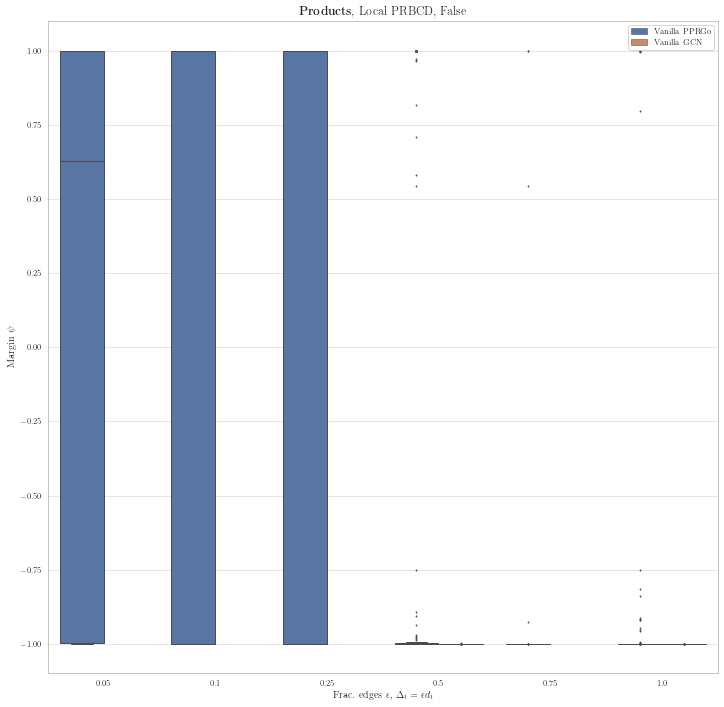

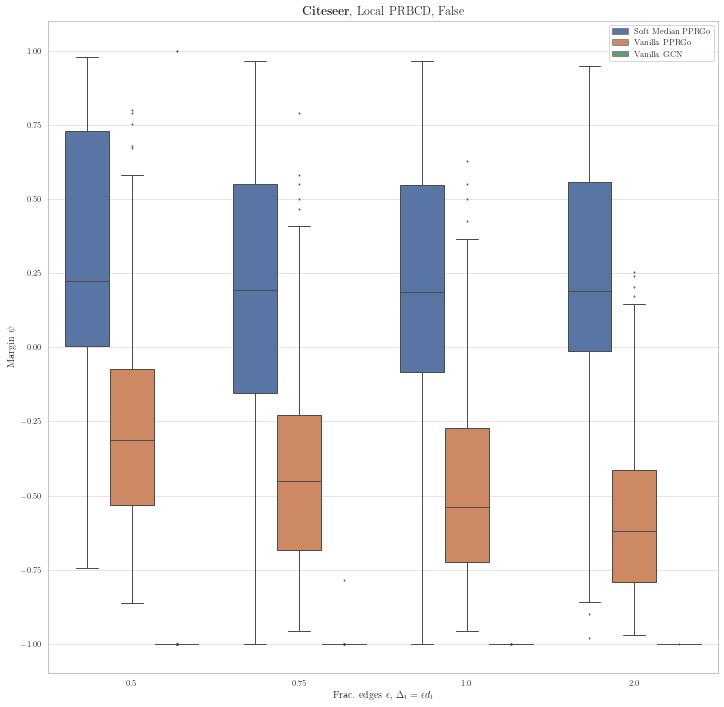

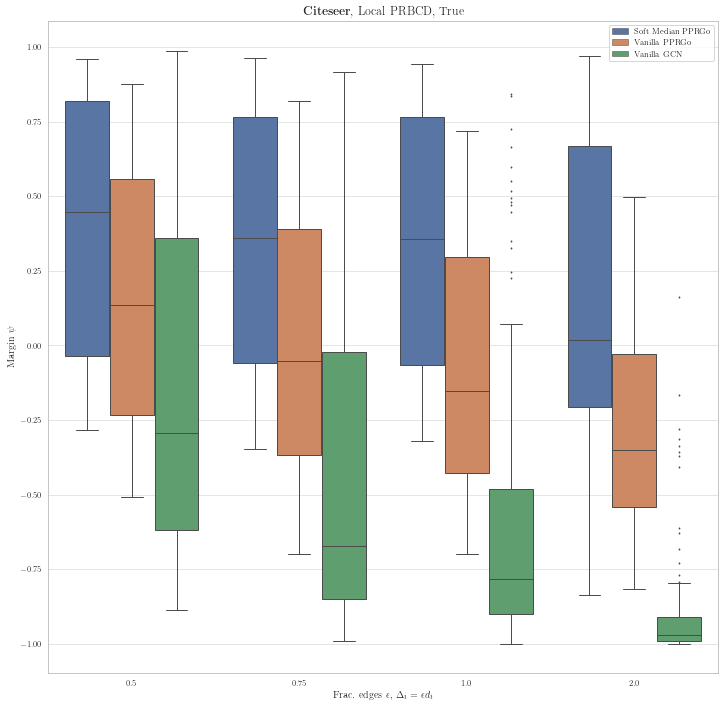

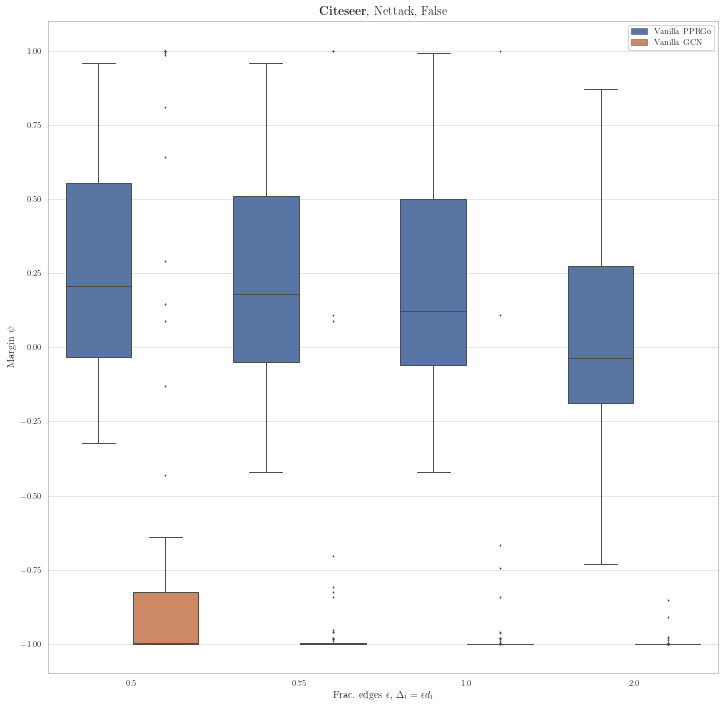

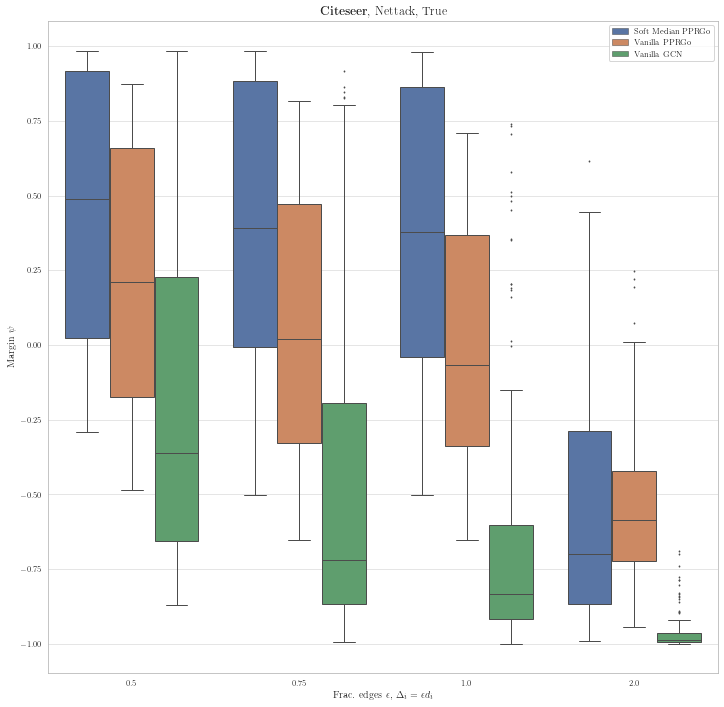

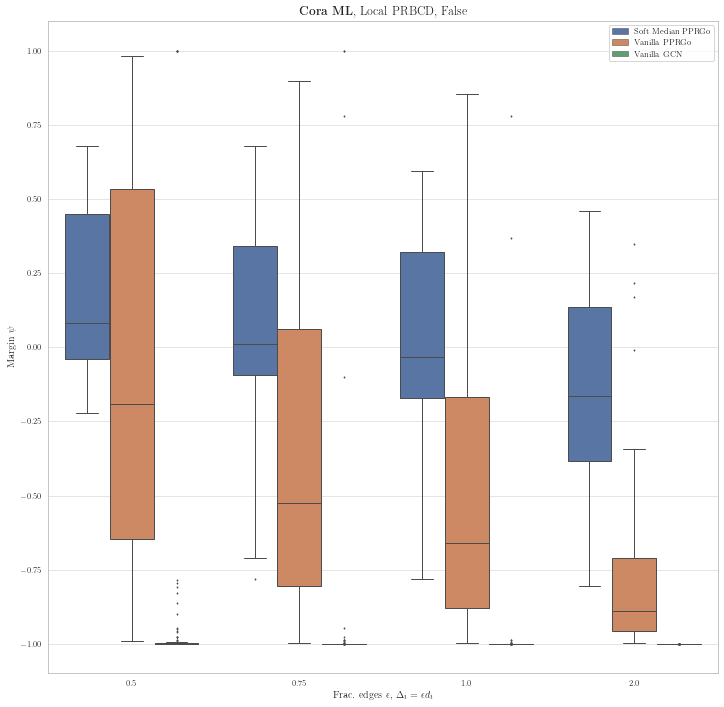

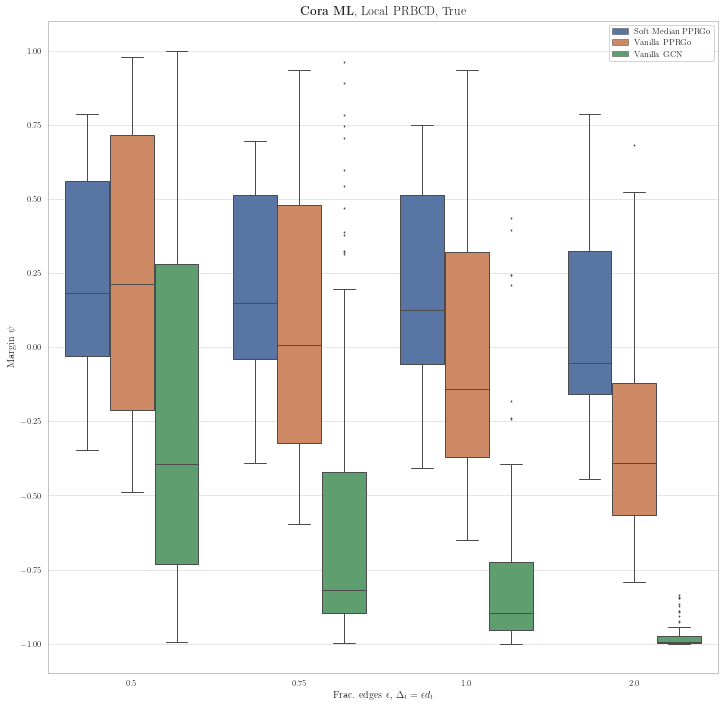

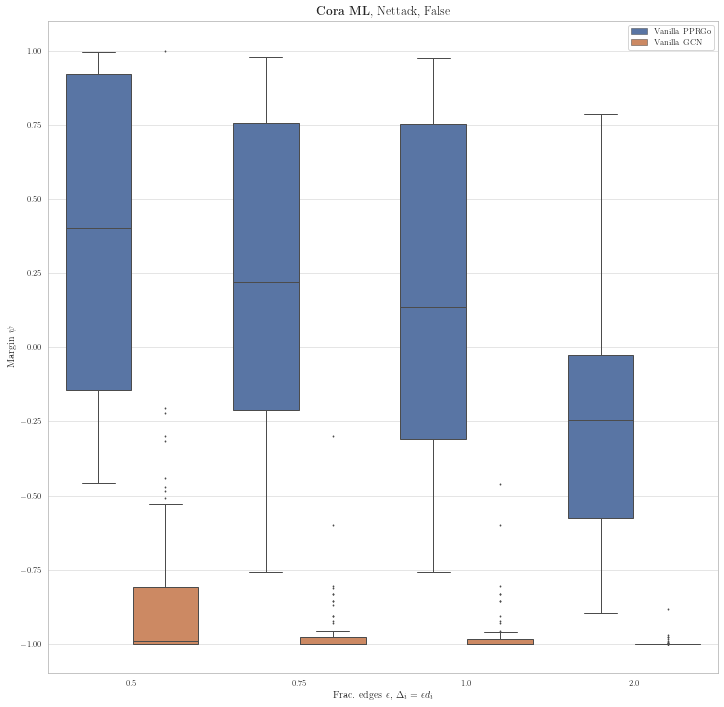

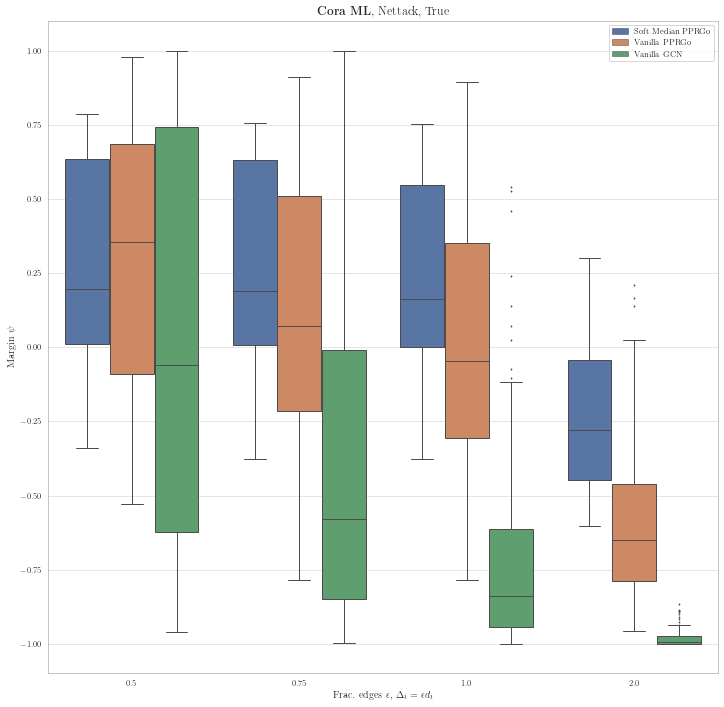

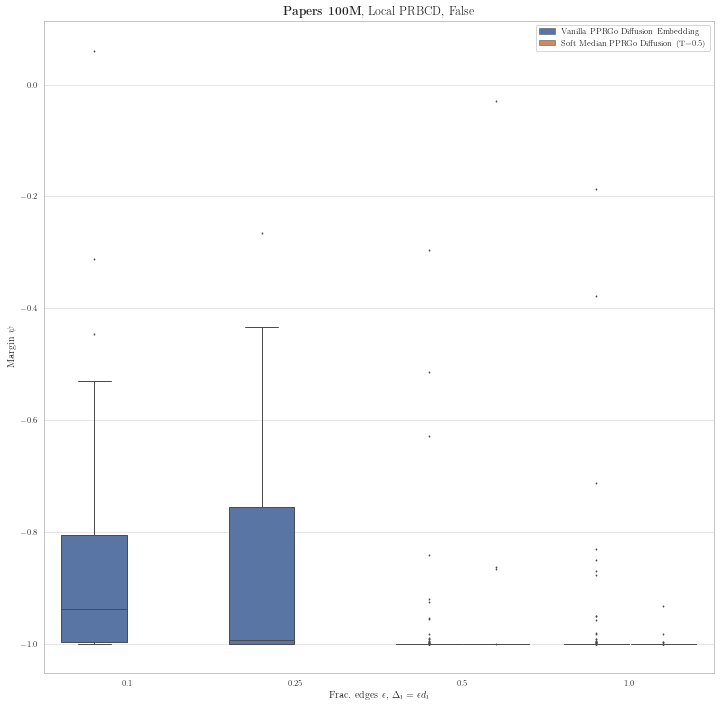

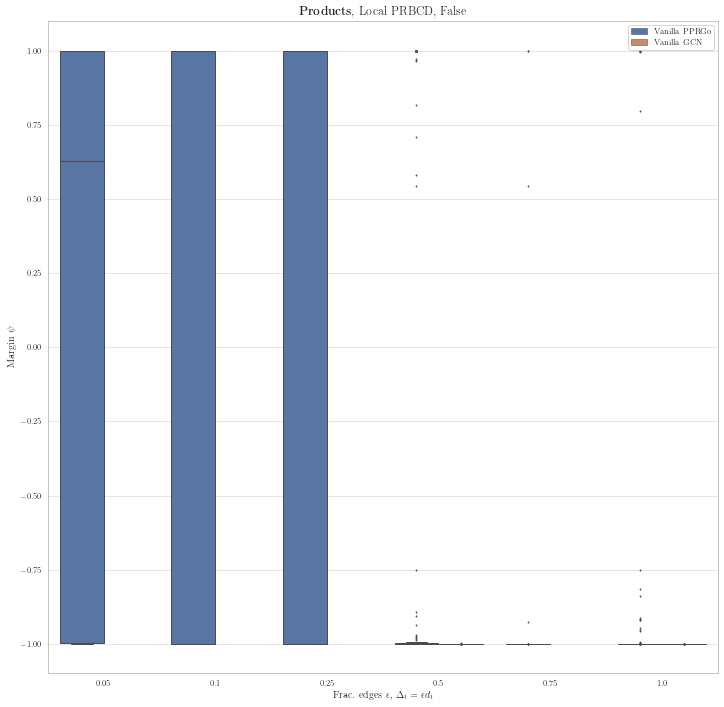

In [165]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

for (dataset, attack, make_undirected), df_group in (
    df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        #& (df_tmp.initial_margin >= 0)
        #& (df_tmp.epsilon.isin([0.5, 1]))
        #& ((df_tmp.dataset != 'ogbn-products') | ~df_tmp.make_undirected.fillna(False))
        #   (
        #    (~df_tmp.make_undirected.fillna(False) & (df_tmp.label == 'Vanilla PPRGo'))
        #    | (df_tmp.make_undirected.fillna(True) & (df_tmp.label != 'Vanilla PPRGo'))
        #))
    ].groupby(['dataset', 'attack', 'make_undirected'])
):
    print(dataset, attack, make_undirected)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list(dict.fromkeys([
        transform_label(l) for l in labels_to_plot if l in df_group['label'].unique()
    ]).keys())
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.30, ratio_yx=1)
    ax.set_title(f'{dataset_map[dataset]}, {attack}, {make_undirected}')
    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.margin,
        hue=df_group[architecture_c],
        hue_order=hue_order,
        fliersize=1
    )
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    plt.ylabel('')
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_leglab', fig, close_fig=False)
    plt.ylabel(margin_c)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_legend', fig, close_fig=False)
    ax.legend(handles=handles, labels=labels)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin', fig, close_fig=False)
    mpl_latex.dedicated_legend_plot(
        f'latex/assets/local_{attack}_{dataset}_boxplmargin_legend',
        mod_label=lambda l: l,
        ncol=3
    )
    
plt.gcf()

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
No handles with labels found to put in legend.
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
No handles with labels found to put in legend.
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preambl

citeseer Local PRBCD False
Architecture
Soft Median PPRGo    154
Vanilla GCN          480
Vanilla PPRGo        476
Name: epsilon, dtype: int64
citeseer Local PRBCD True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64
citeseer Nettack False
Architecture
Vanilla GCN      300
Vanilla PPRGo    536
Name: epsilon, dtype: int64
citeseer Nettack True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64
cora_ml Local PRBCD False
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        320
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
No handles with labels found to put in legend.
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
No handles with labels found to put in legend.
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale_refactoring/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preambl

cora_ml Local PRBCD True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64
cora_ml Nettack False
Architecture
Vanilla GCN      264
Vanilla PPRGo    184
Name: epsilon, dtype: int64
cora_ml Nettack True
Architecture
Soft Median PPRGo    480
Vanilla GCN          480
Vanilla PPRGo        480
Name: epsilon, dtype: int64
ogbn-papers100M Local PRBCD False
Architecture
Soft Median PPRGo Diffusion (T=0.5)     68
Vanilla PPRGo Diffusion Embedding      320
Name: epsilon, dtype: int64
ogbn-products Local PRBCD False
Architecture
Vanilla GCN      247
Vanilla PPRGo    656
Name: epsilon, dtype: int64


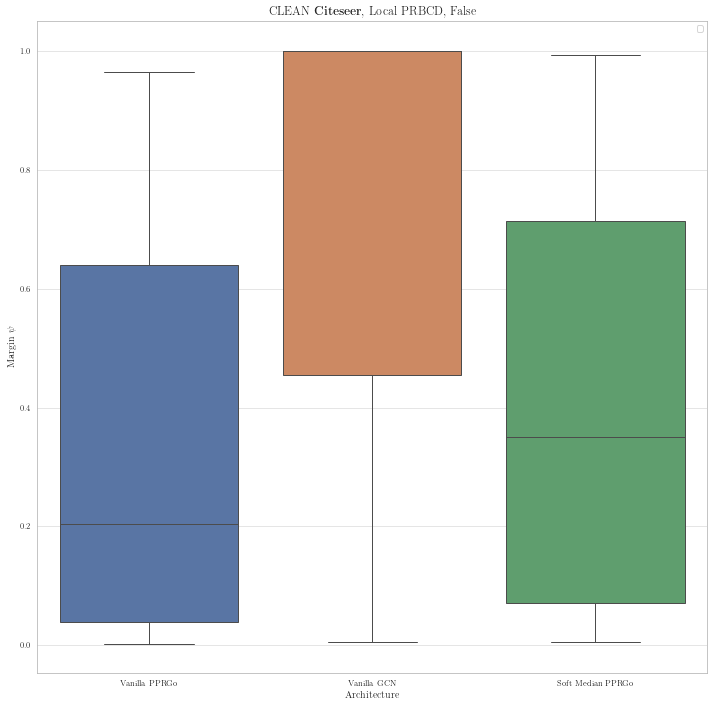

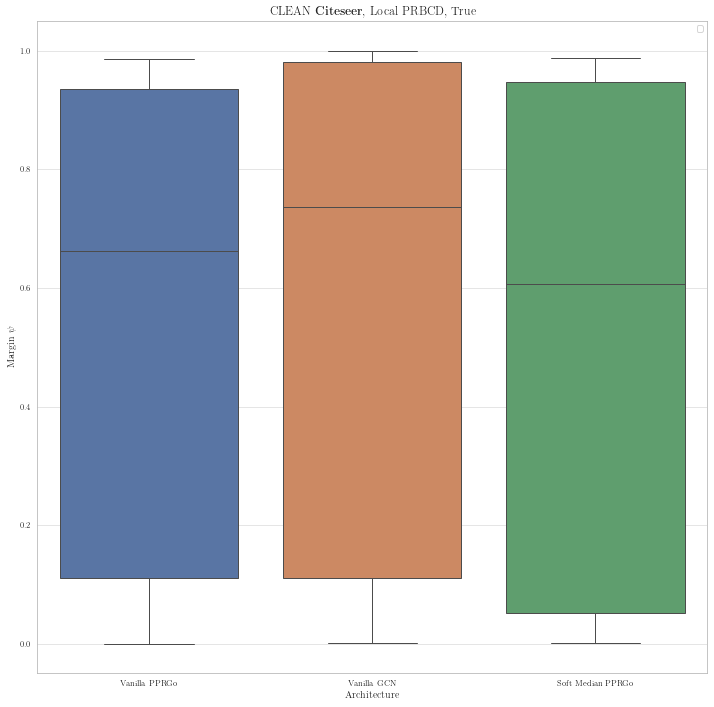

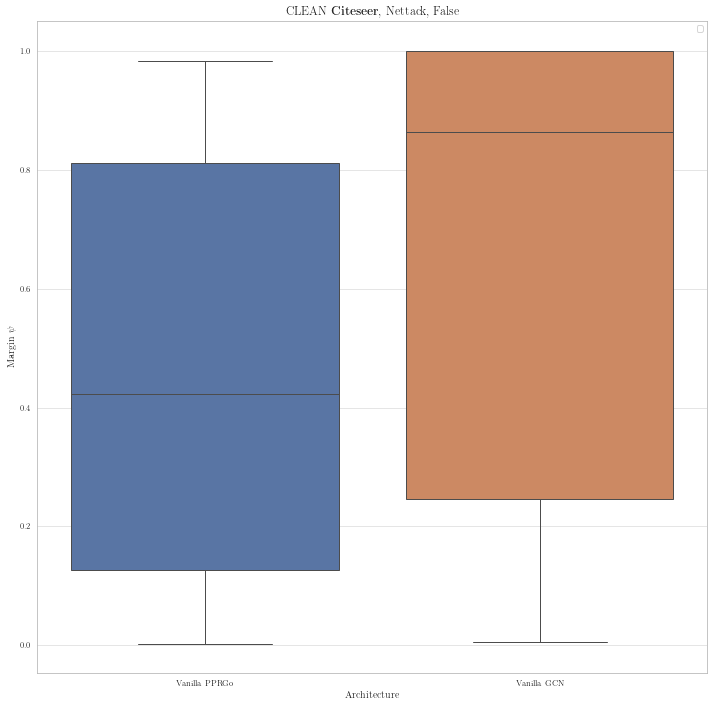

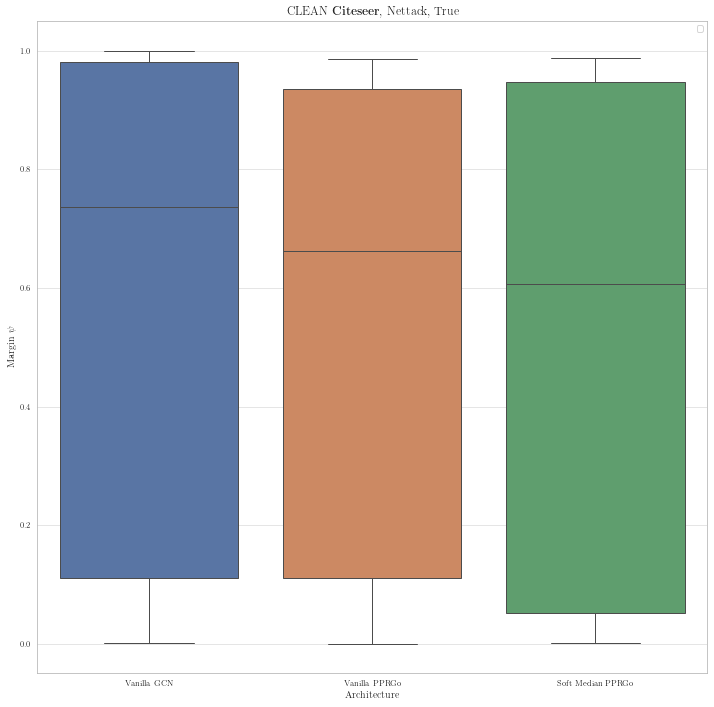

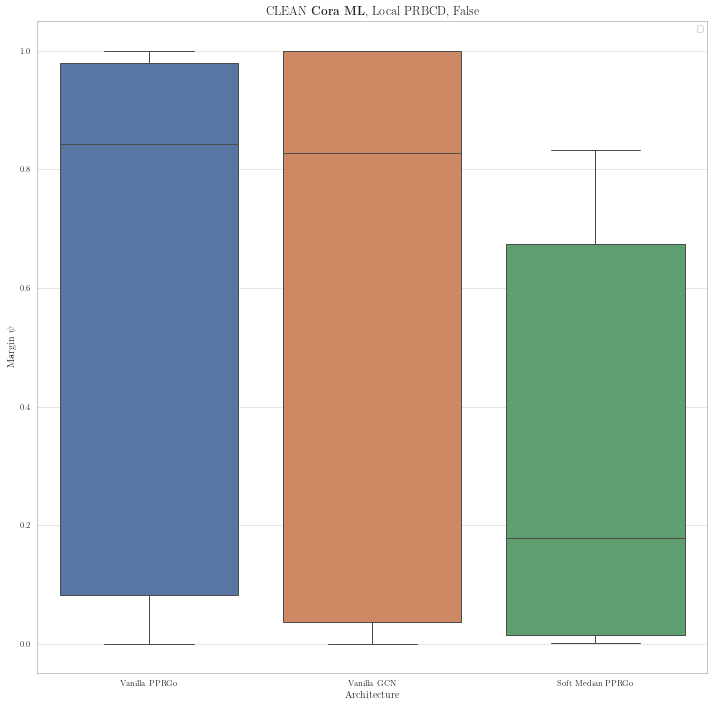

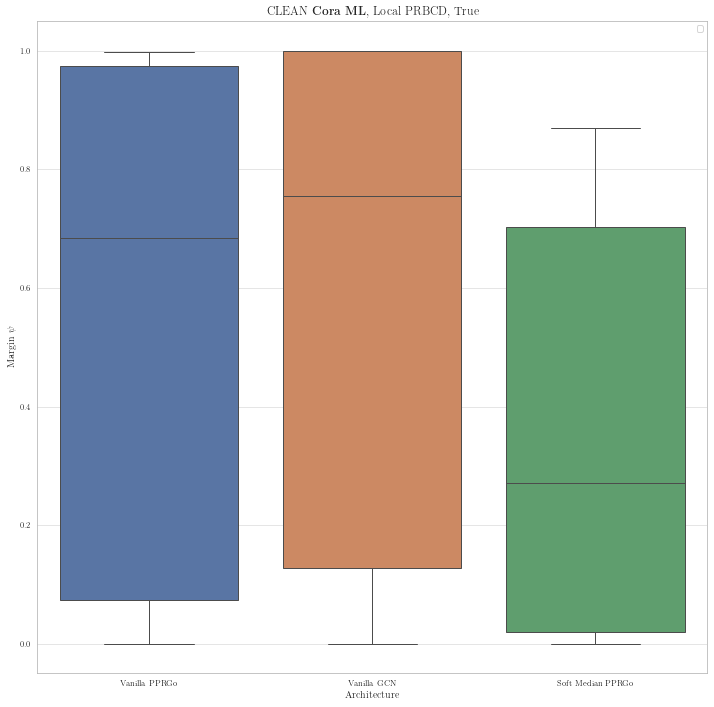

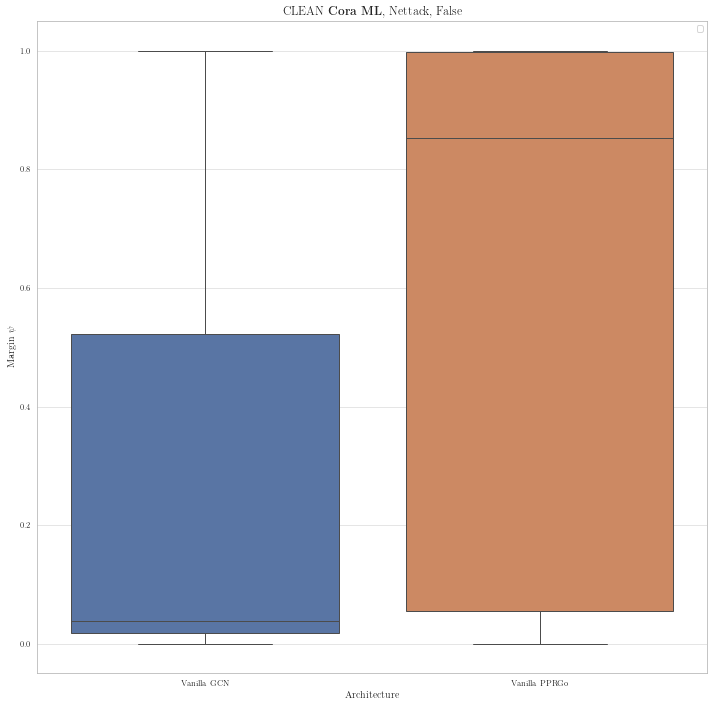

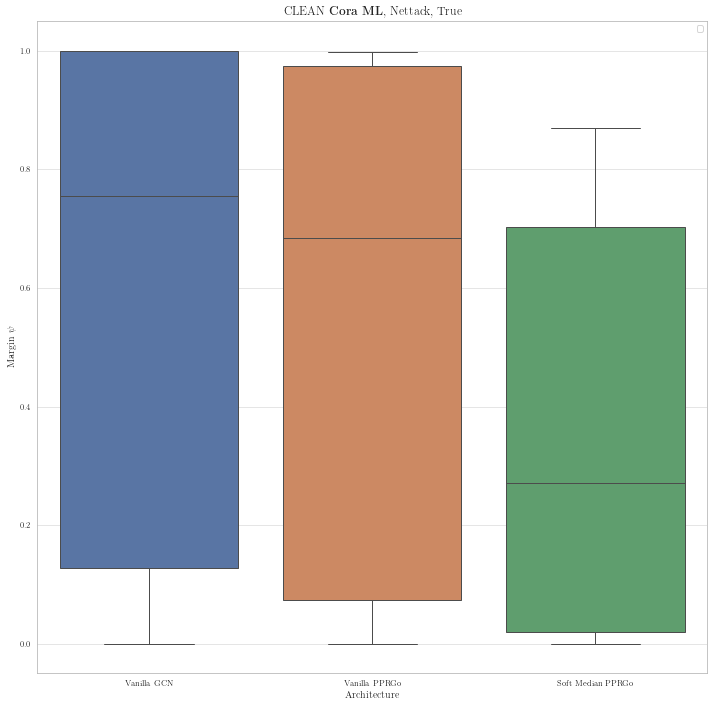

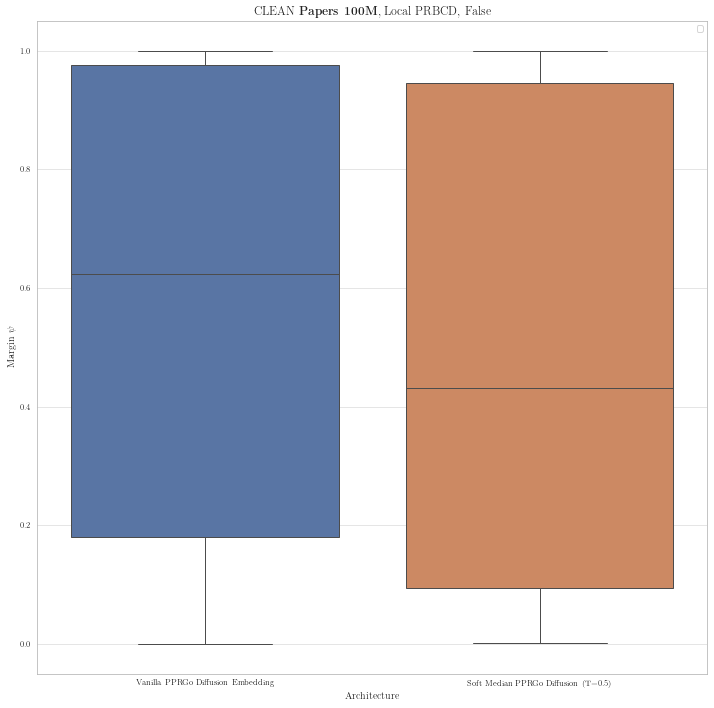

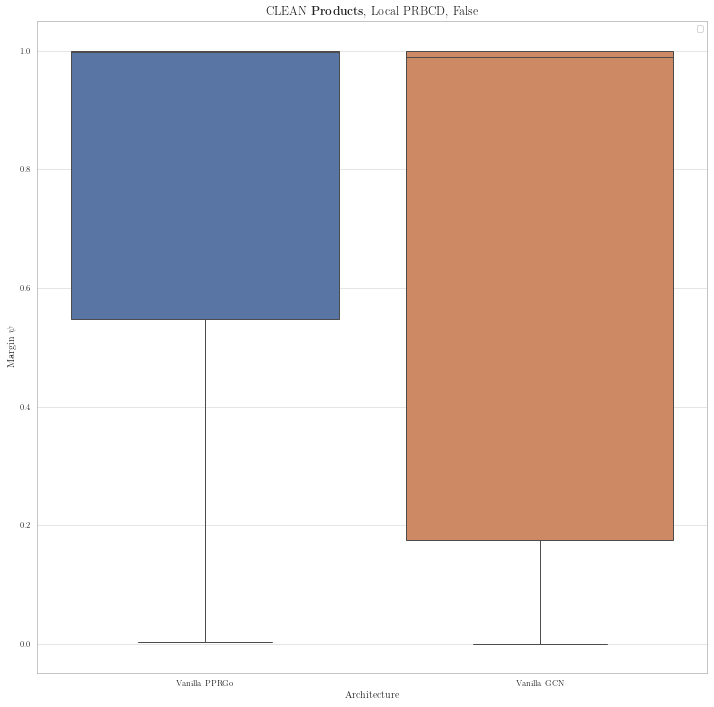

In [166]:
df_tmp = df_results.copy()
df_tmp.attack = df_tmp.attack.apply(lambda attack: attack_map[attack])

for (dataset, attack, make_undirected), df_group in (
    df_tmp[
        df_tmp.label.isin(labels_to_plot) 
        #& (df_tmp.initial_margin >= 0)
        #& (df_tmp.epsilon.isin([0.5, 1]))
        #& ((df_tmp.dataset != 'ogbn-products') | ~df_tmp.make_undirected.fillna(False))
        #   (
        #    (~df_tmp.make_undirected.fillna(False) & (df_tmp.label == 'Vanilla PPRGo'))
        #    | (df_tmp.make_undirected.fillna(True) & (df_tmp.label != 'Vanilla PPRGo'))
        #))
    ].groupby(['dataset', 'attack', 'make_undirected'])
):
    print(dataset, attack, make_undirected)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list(dict.fromkeys([
        transform_label(l) for l in labels_to_plot if l in df_group['label'].unique()
    ]).keys())
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.30, ratio_yx=1)
    ax.set_title(f'CLEAN {dataset_map[dataset]}, {attack}, {make_undirected}')

    sns.boxplot(
        x=df_group[architecture_c].rename('Architecture'),
        y=df_group.initial_margin.rename('Margin'),
        #hue=df_group[architecture_c],
        #hue_order=hue_order,
        fliersize=1
    )
    
    handles, labels = ax.get_legend_handles_labels()
    #ax.get_legend().remove()
    
    plt.ylabel('')
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_leglab', fig, close_fig=False)
    plt.ylabel(margin_c)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_legend', fig, close_fig=False)
    ax.legend(handles=handles, labels=labels)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin', fig, close_fig=False)
    mpl_latex.dedicated_legend_plot(
        f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_legend',
        mod_label=lambda l: l,
        ncol=3
    )

In [ ]:
plt.gcf()